## Readme

In [1]:
# LightGBMはNumerai環境上では4.0.0のため、再インストールしています
!pip install -Uqq numerapi

In [2]:
import gc
import os
import json
import numerapi
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm
from collections import defaultdict
from contextlib import redirect_stderr

In [3]:
napi = numerapi.NumerAPI()
# Notebook実行時に大量に出力がでてしまうため抑制
with redirect_stderr(open(os.devnull, 'w')):
    napi.download_dataset("v5.0/train.parquet", "train.parquet")
    napi.download_dataset("v5.0/validation.parquet", "valid.parquet")
    napi.download_dataset("v5.0/features.json", "features.json")
    

In [4]:
def calc_pearson(path_name):
    dd = defaultdict(lambda: defaultdict(float))
    df = pd.read_parquet(f"{path_name}.parquet", columns=feature_cols+["era"]).dropna()
    eras = sorted(df["era"].unique())

    rows = []
    for era in tqdm(eras):
        if era == "X":
            corr = df.query(f"era == '{era}'").drop("era", axis=1).corr()
        else:
            corr = df.query("era == @era").drop("era", axis=1).corr()
        rows.append([corr.loc[col1, col2] for col1, col2 in itertools.combinations(feature_cols, 2)])
    del corr, df; gc.collect()

    cols = [f"{col1}_{col2}" for col1, col2 in itertools.combinations(feature_cols, 2)]
    df_corr = pd.DataFrame(
        rows,
        index=eras,
        columns=cols,
        dtype=np.float16
    )
    del rows, cols; gc.collect()
    
    df_corr.to_pickle(f"era_corr.{path_name}.pearson.pkl")
    del df_corr; gc.collect()

In [5]:
# 特徴量の選択
feature_set_name = "medium"
feature_metadata = json.load(open("features.json"))
feature_cols = feature_metadata["feature_sets"][feature_set_name]

In [6]:
train = pd.read_parquet("train.parquet", columns=feature_cols+["era", "target"])

In [7]:
len(train[["era"]].query("era == '0574'"))

5580

In [8]:
del train; gc.collect()

0

In [9]:
calc_pearson("train")
calc_pearson("valid")

  0%|          | 0/574 [00:00<?, ?it/s]

  0%|          | 0/550 [00:00<?, ?it/s]

In [10]:
!rm *.parquet *.json

## Visualize era features

  0%|          | 0/1124 [00:00<?, ?it/s]

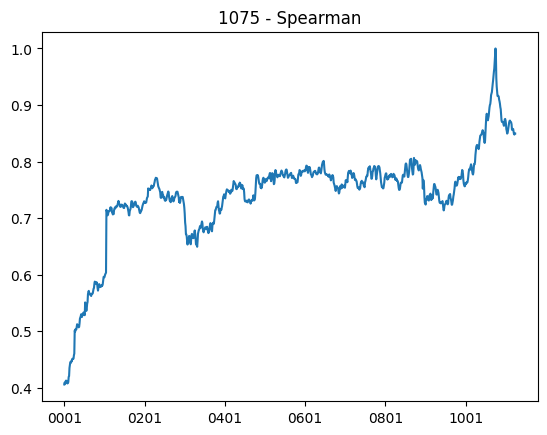

  0%|          | 0/1124 [00:00<?, ?it/s]

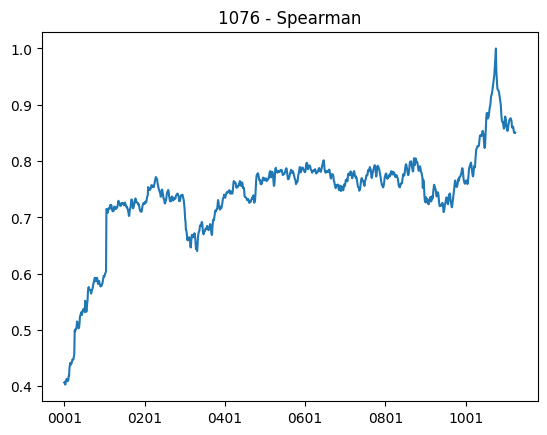

  0%|          | 0/1124 [00:00<?, ?it/s]

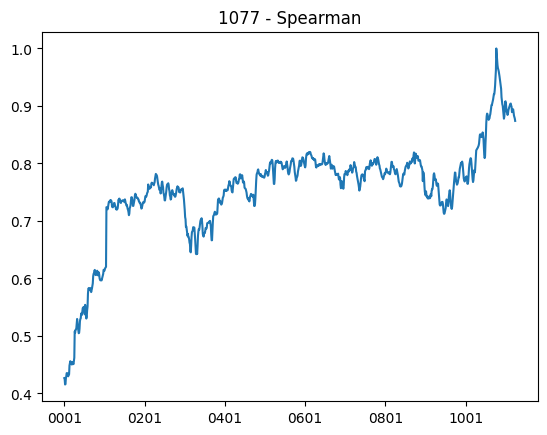

  0%|          | 0/1124 [00:00<?, ?it/s]

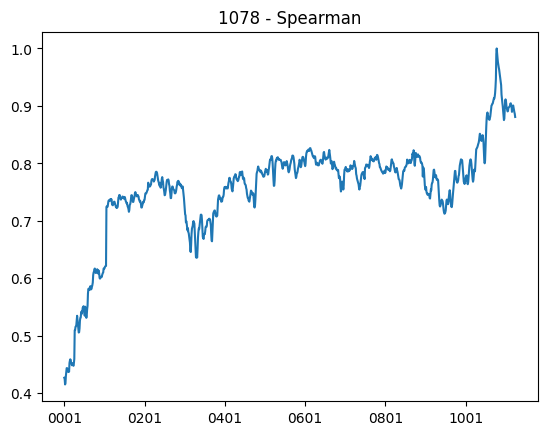

  0%|          | 0/1124 [00:00<?, ?it/s]

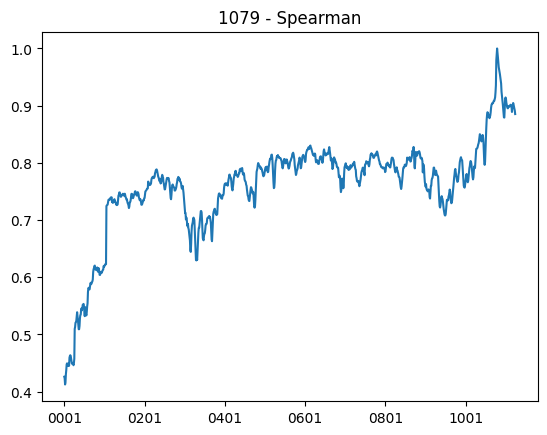

  0%|          | 0/1124 [00:00<?, ?it/s]

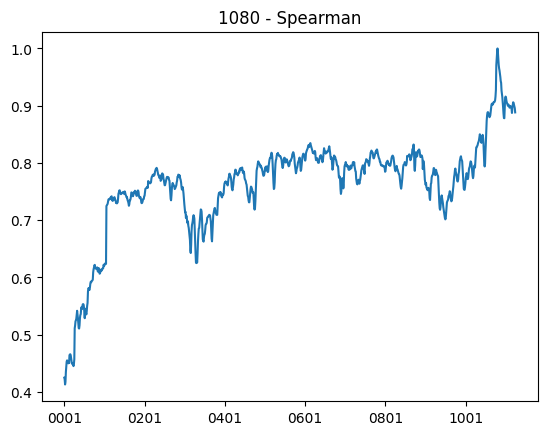

  0%|          | 0/1124 [00:00<?, ?it/s]

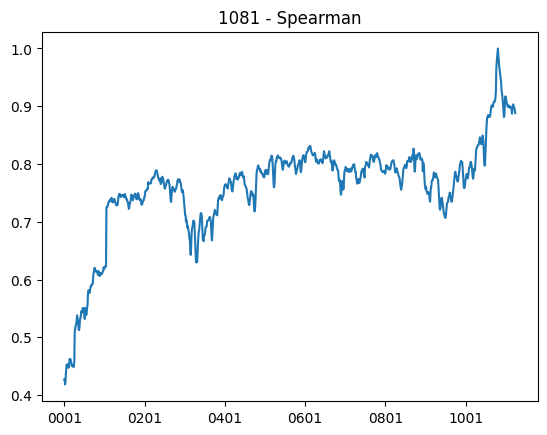

  0%|          | 0/1124 [00:00<?, ?it/s]

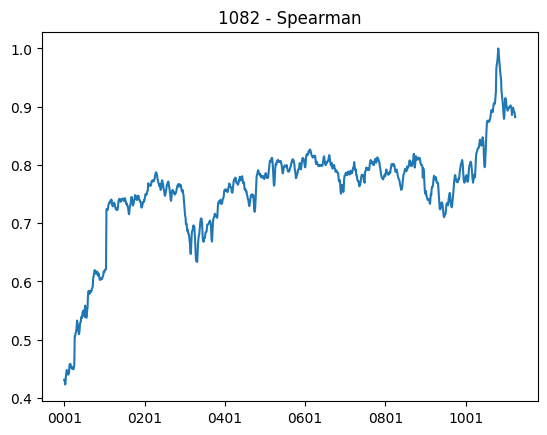

  0%|          | 0/1124 [00:00<?, ?it/s]

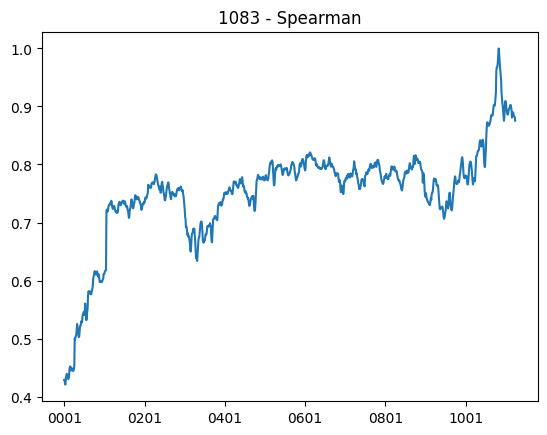

  0%|          | 0/1124 [00:00<?, ?it/s]

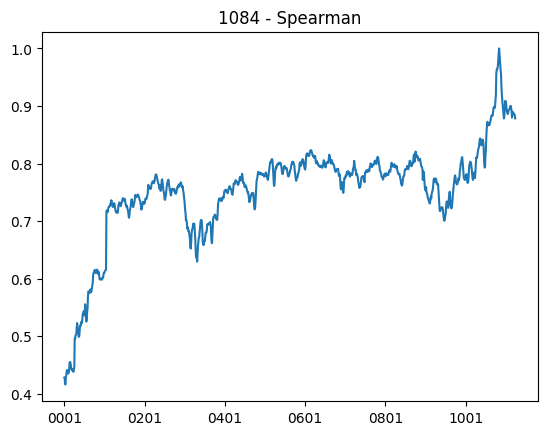

  0%|          | 0/1124 [00:00<?, ?it/s]

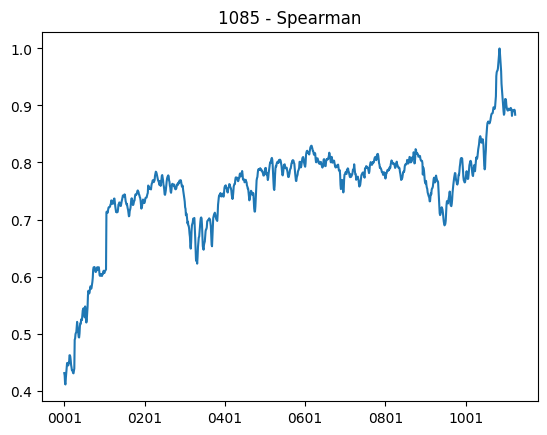

  0%|          | 0/1124 [00:00<?, ?it/s]

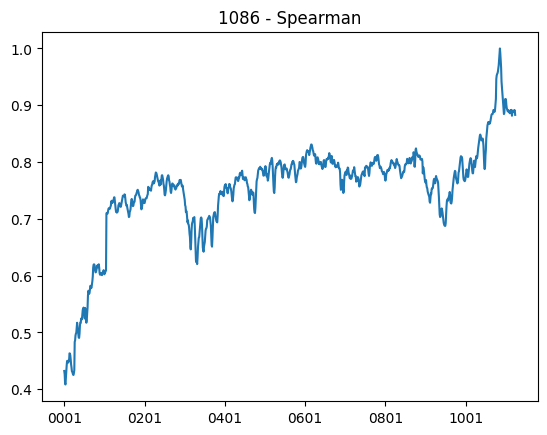

  0%|          | 0/1124 [00:00<?, ?it/s]

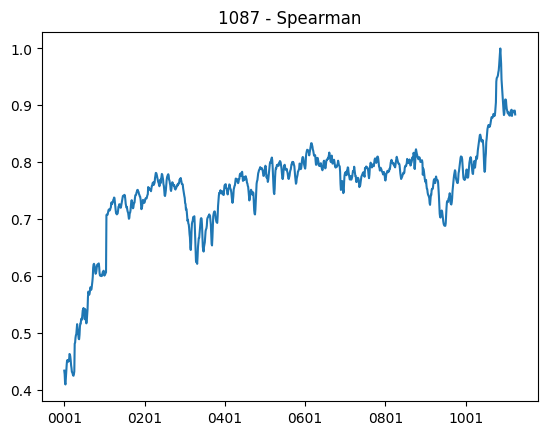

  0%|          | 0/1124 [00:00<?, ?it/s]

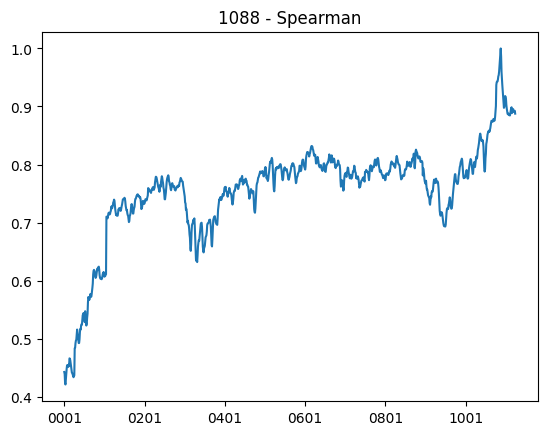

  0%|          | 0/1124 [00:00<?, ?it/s]

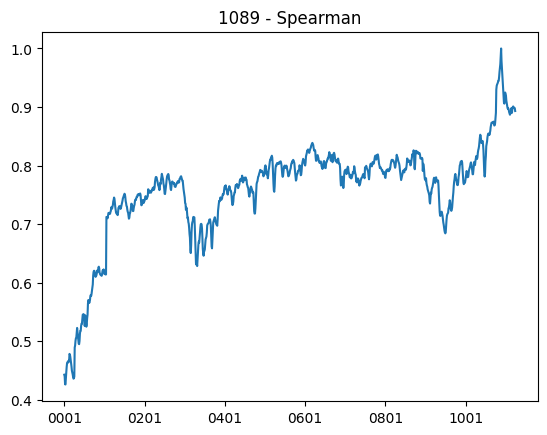

  0%|          | 0/1124 [00:00<?, ?it/s]

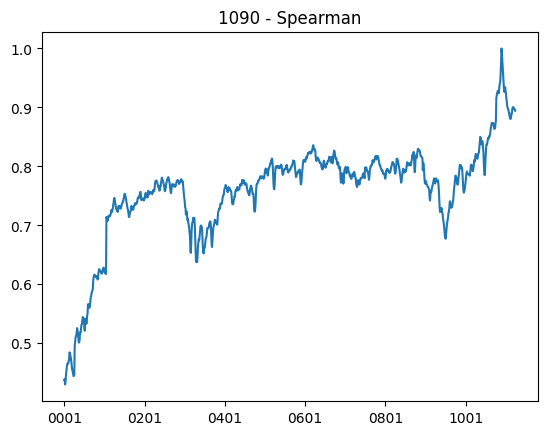

  0%|          | 0/1124 [00:00<?, ?it/s]

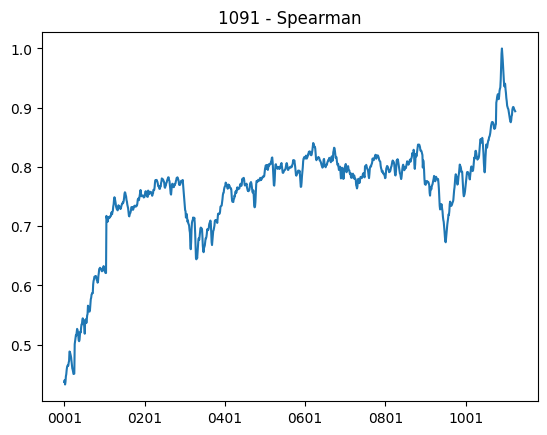

  0%|          | 0/1124 [00:00<?, ?it/s]

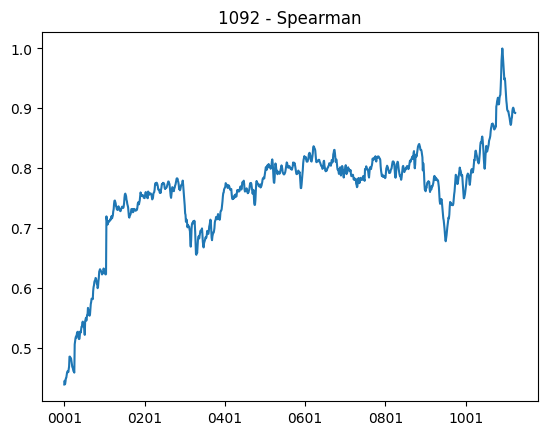

  0%|          | 0/1124 [00:00<?, ?it/s]

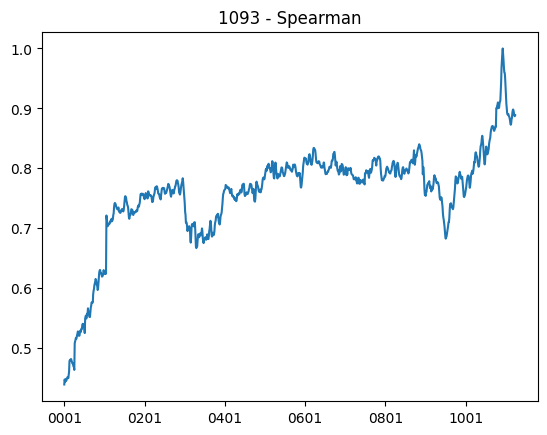

  0%|          | 0/1124 [00:00<?, ?it/s]

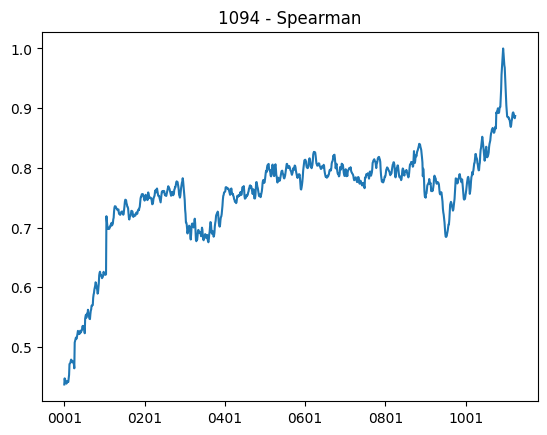

  0%|          | 0/1124 [00:00<?, ?it/s]

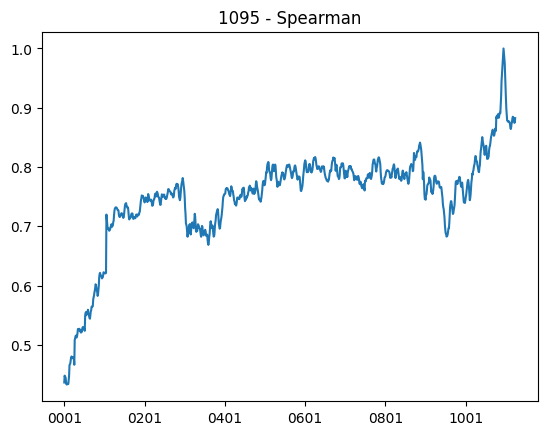

  0%|          | 0/1124 [00:00<?, ?it/s]

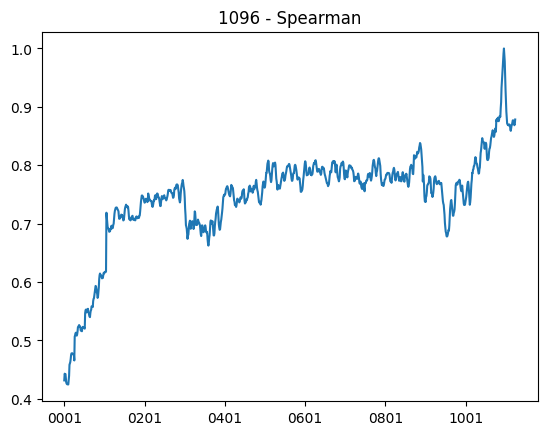

  0%|          | 0/1124 [00:00<?, ?it/s]

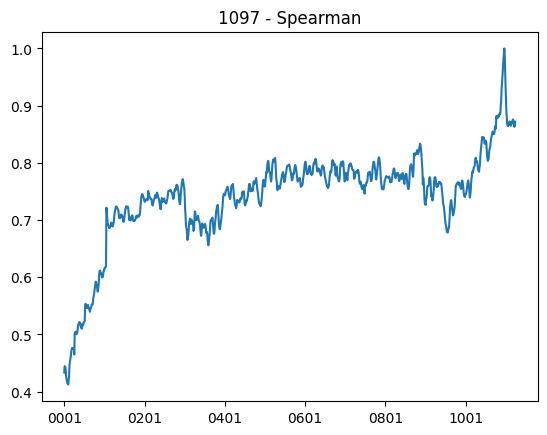

  0%|          | 0/1124 [00:00<?, ?it/s]

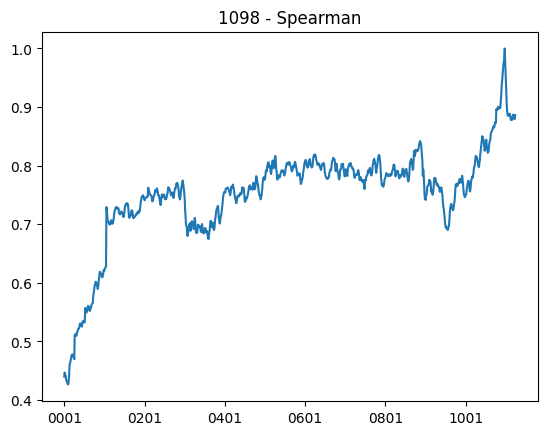

  0%|          | 0/1124 [00:00<?, ?it/s]

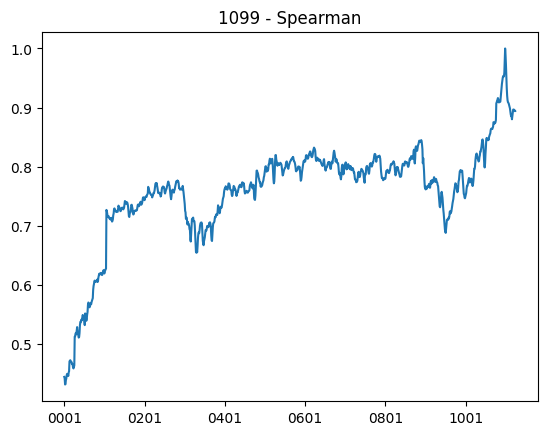

  0%|          | 0/1124 [00:00<?, ?it/s]

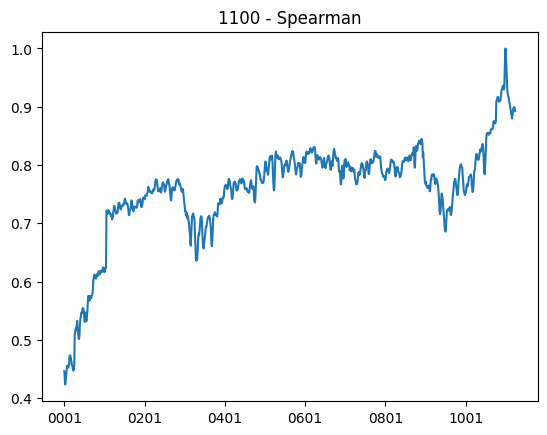

  0%|          | 0/1124 [00:00<?, ?it/s]

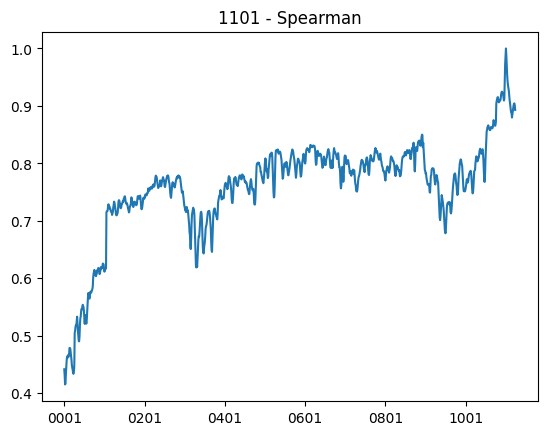

  0%|          | 0/1124 [00:00<?, ?it/s]

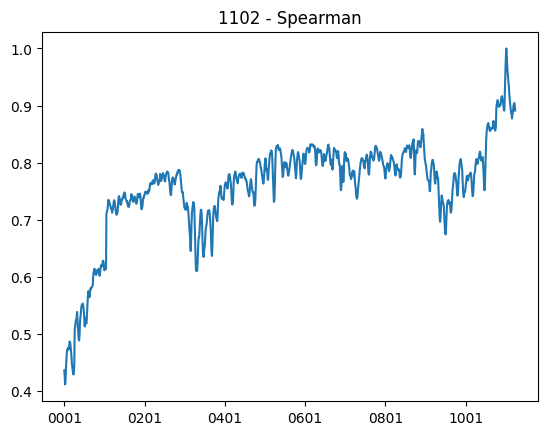

  0%|          | 0/1124 [00:00<?, ?it/s]

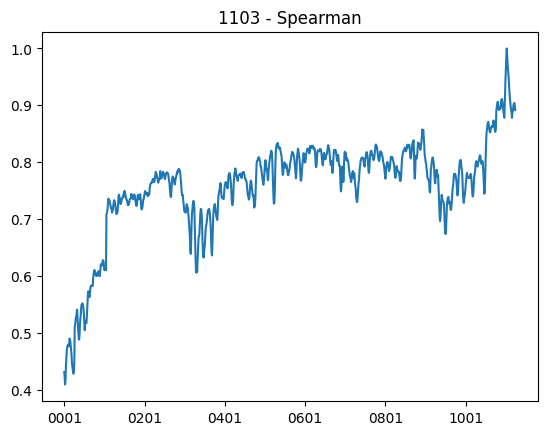

  0%|          | 0/1124 [00:00<?, ?it/s]

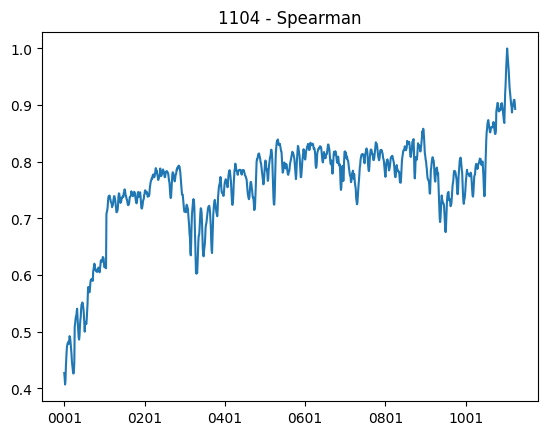

  0%|          | 0/1124 [00:00<?, ?it/s]

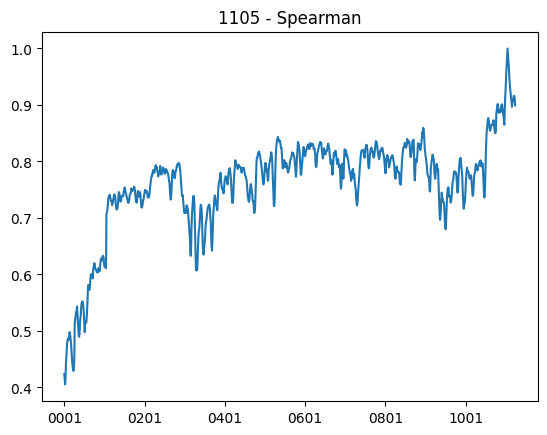

  0%|          | 0/1124 [00:00<?, ?it/s]

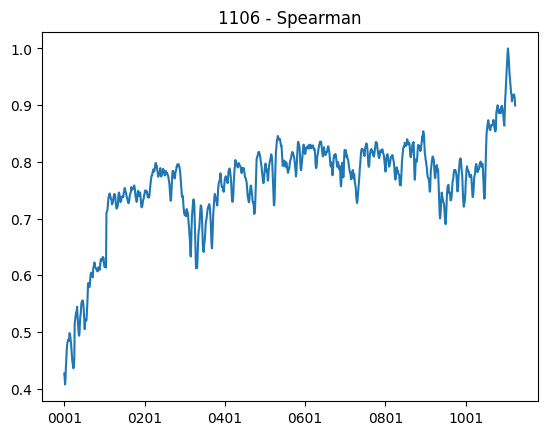

  0%|          | 0/1124 [00:00<?, ?it/s]

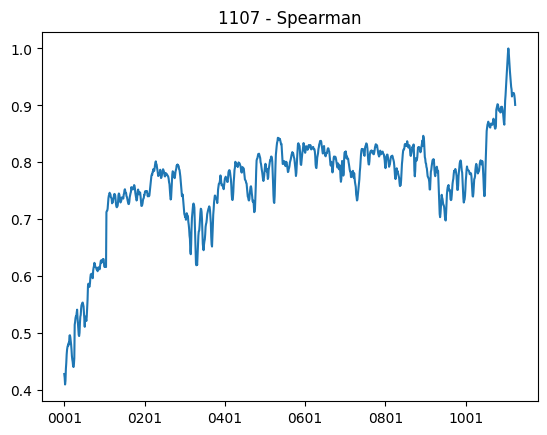

  0%|          | 0/1124 [00:00<?, ?it/s]

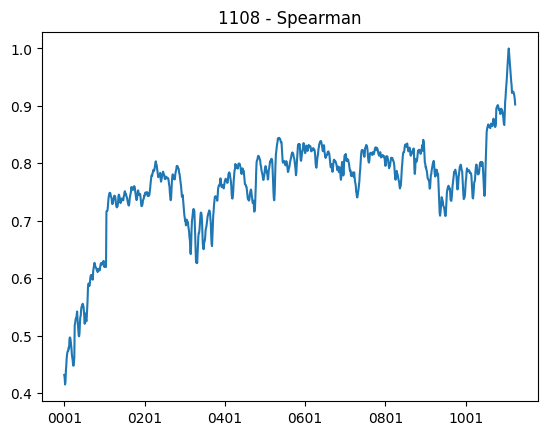

  0%|          | 0/1124 [00:00<?, ?it/s]

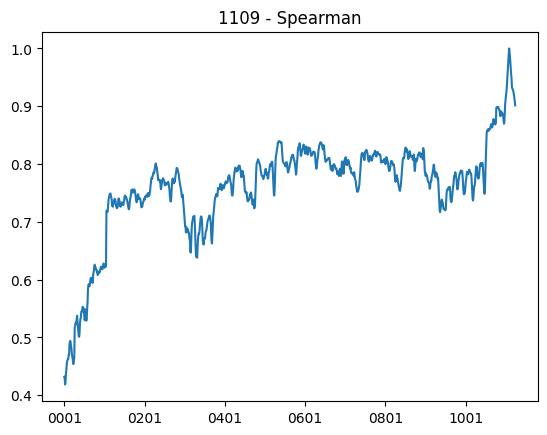

  0%|          | 0/1124 [00:00<?, ?it/s]

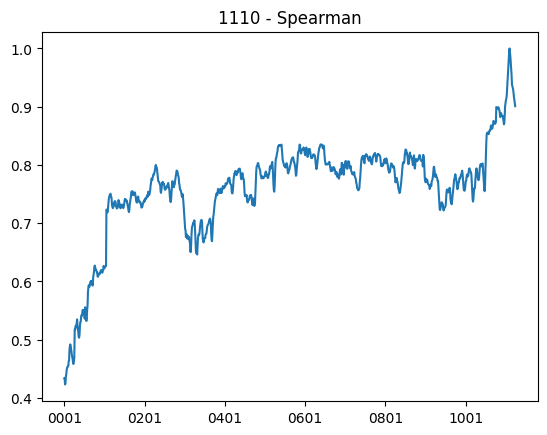

  0%|          | 0/1124 [00:00<?, ?it/s]

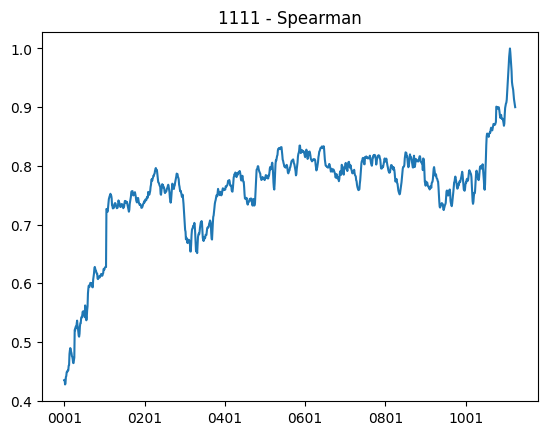

  0%|          | 0/1124 [00:00<?, ?it/s]

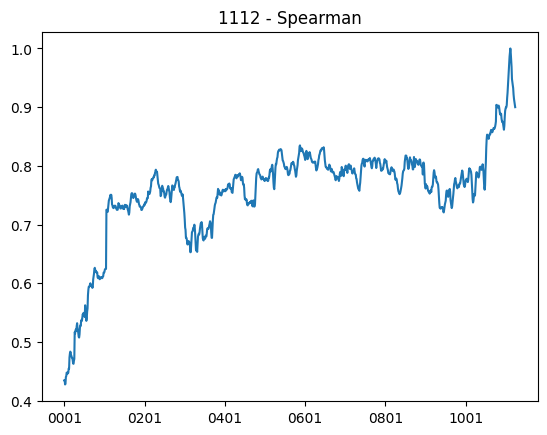

  0%|          | 0/1124 [00:00<?, ?it/s]

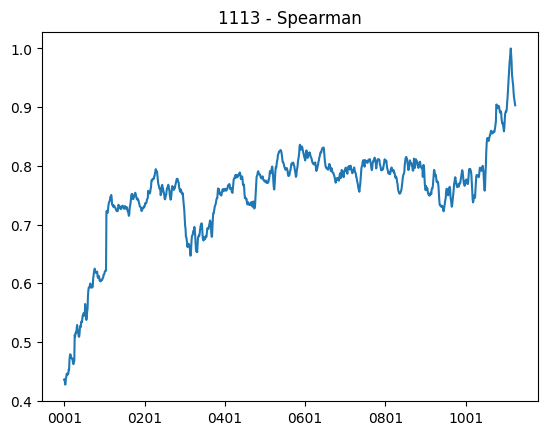

  0%|          | 0/1124 [00:00<?, ?it/s]

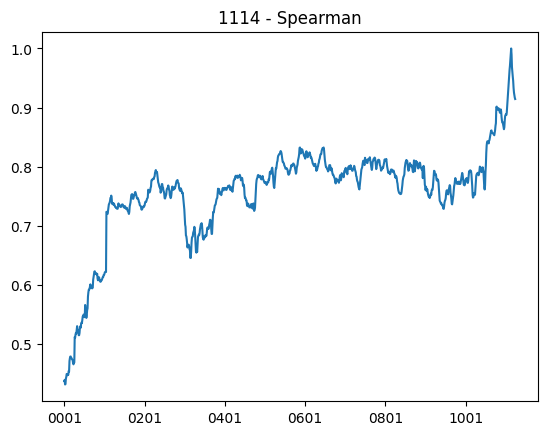

  0%|          | 0/1124 [00:00<?, ?it/s]

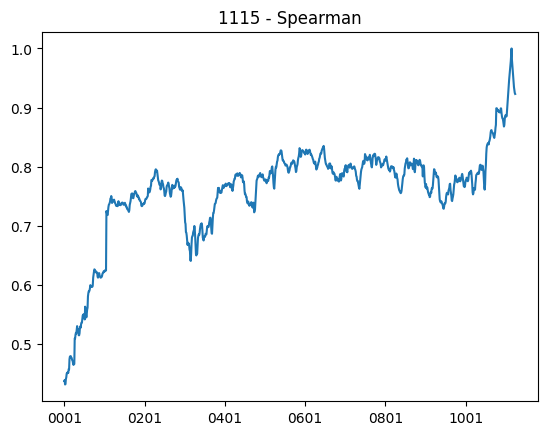

  0%|          | 0/1124 [00:00<?, ?it/s]

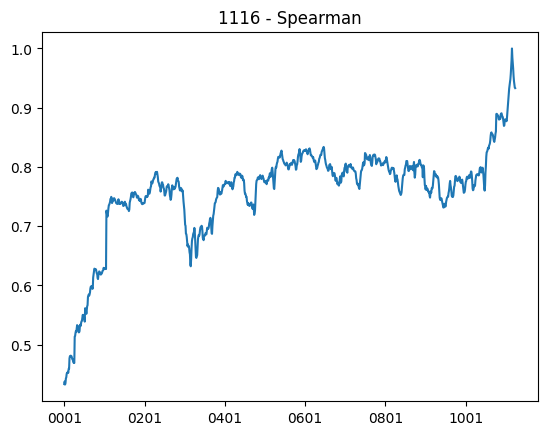

  0%|          | 0/1124 [00:00<?, ?it/s]

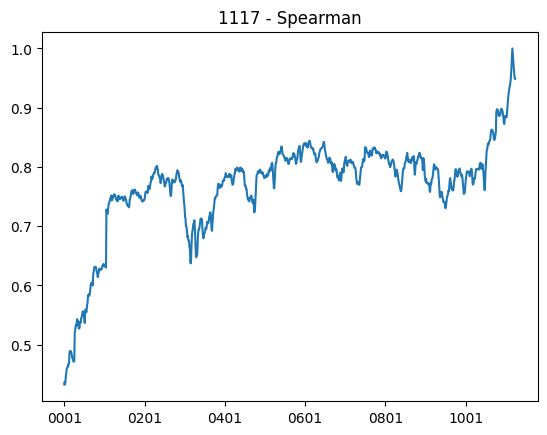

  0%|          | 0/1124 [00:00<?, ?it/s]

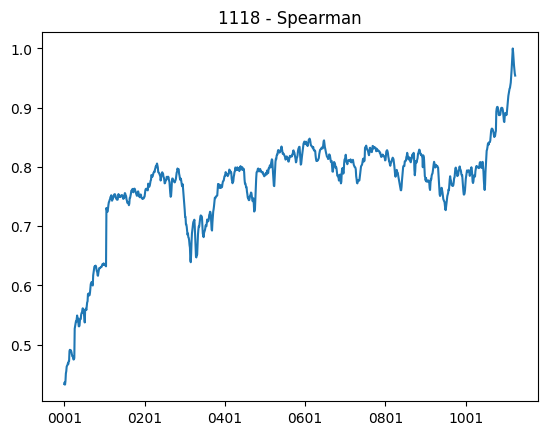

  0%|          | 0/1124 [00:00<?, ?it/s]

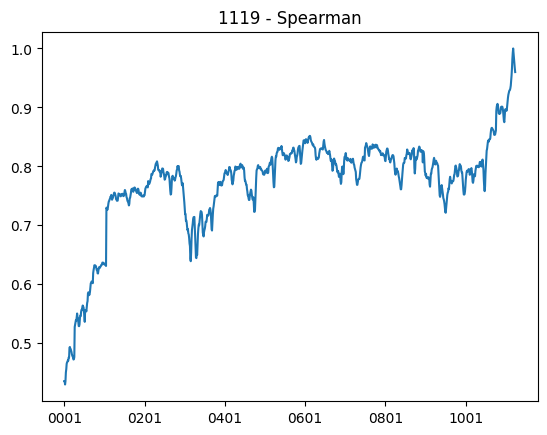

  0%|          | 0/1124 [00:00<?, ?it/s]

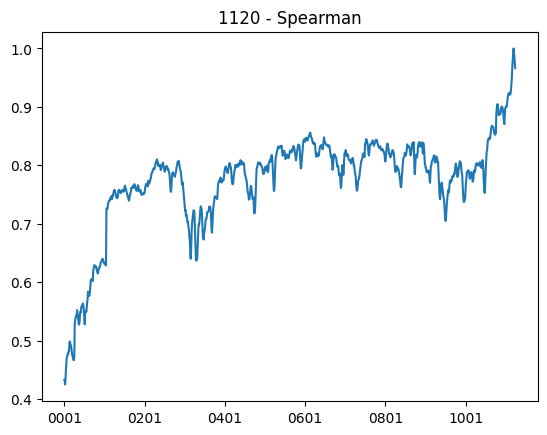

  0%|          | 0/1124 [00:00<?, ?it/s]

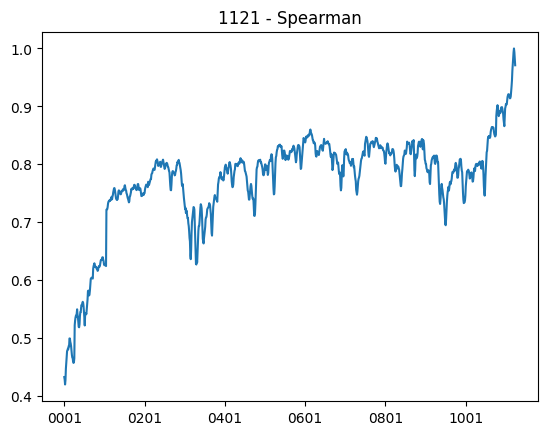

  0%|          | 0/1124 [00:00<?, ?it/s]

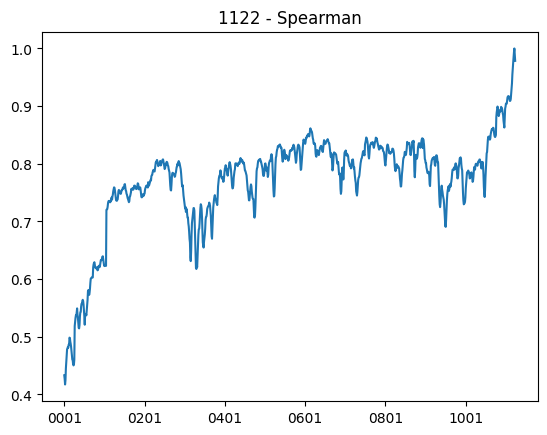

  0%|          | 0/1124 [00:00<?, ?it/s]

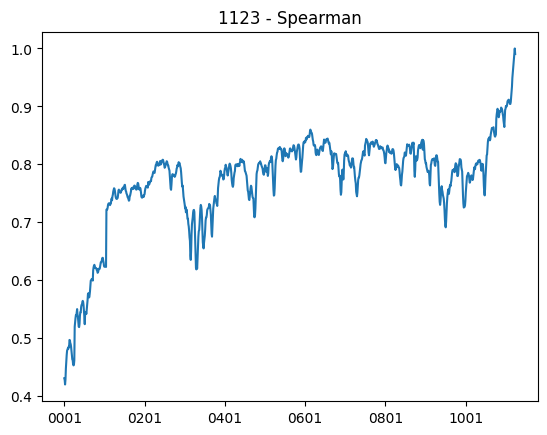

  0%|          | 0/1124 [00:00<?, ?it/s]

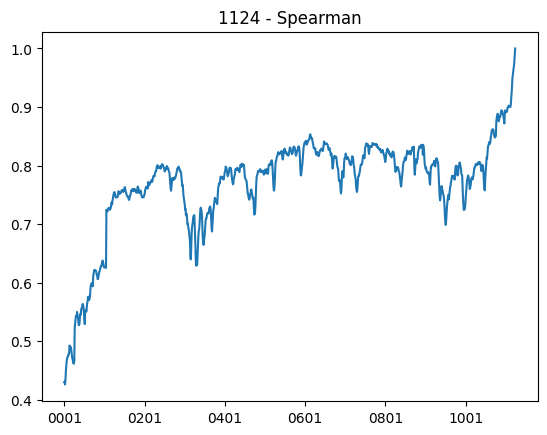

In [11]:
path_in_dir = "."

train = pd.read_pickle(f"{path_in_dir}/era_corr.train.pearson.pkl")
valid = pd.read_pickle(f"{path_in_dir}/era_corr.valid.pearson.pkl")
df = pd.concat([train, valid]).T.astype(np.float32).fillna(0)

for col1 in df.columns[-50:]:
    d1 = {}
    d2 = {}
    for col in tqdm(df.columns):
        spr, spp = st.spearmanr(df[col], df[col1])
        d1[col] = spr

    pd.Series(d1).plot()
    plt.title(f"{col1} - Spearman")

    # Show the plots
    plt.show()